<a href="https://colab.research.google.com/github/amalsamad369/Data-science-projects/blob/main/Recomendation_E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import TruncatedSVD

In [6]:
amazon_rating=pd.read_csv("/content/ratings_Beauty.csv.zip")

In [ ]:
amazon_rating.head()


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [7]:
amazon_rating.dropna()


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [8]:
amazon_rating.describe()


,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [9]:
amazon_rating.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [10]:
amazon_rating.shape

(2023070, 4)

In [11]:
popular_product=pd.DataFrame(amazon_rating.groupby("ProductId")["Rating"].count())

In [12]:
most_popular=popular_product.sort_values("Rating" , ascending=False)

In [13]:
most_popular.head(30)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Figure size 1500x500 with 0 Axes>

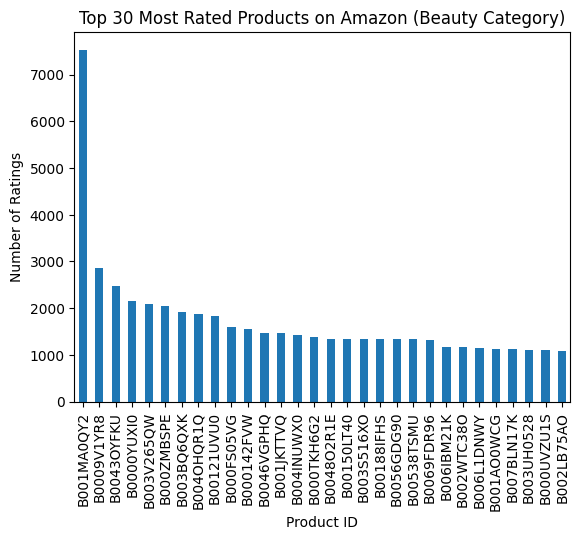

In [15]:
plt.figure(figsize=(15, 5))  # Set figure size
most_popular.head(30).plot(kind="bar", legend=False)
plt.xlabel("Product ID")
plt.ylabel("Number of Ratings")
plt.title("Top 30 Most Rated Products on Amazon (Beauty Category)")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


In [17]:
amazon1_rating=amazon_rating.head(10000)

In [35]:
amazon1_rating.shape

(10000, 4)

In [36]:
rating_utility_matrix=amazon1_rating.pivot_table(values="Rating",index="UserId",columns="ProductId",fill_value="zero")

In [30]:
rating_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,...,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero
A024581134CV80ZBLIZTZ,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,...,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero
A03056581JJIOL5FSKJY7,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,...,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero
A03099101ZRK4K607JVHH,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,...,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero
A0505229A7NSH3FRXRR4,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,...,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero


In [31]:
X=rating_utility_matrix.T

In [32]:
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,...,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero
0558925278,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,...,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero
0733001998,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,...,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero
0737104473,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,...,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero
0762451459,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero,...,zero,zero,zero,zero,zero,zero,zero,zero,zero,zero


In [34]:
X.shape

(886, 9697)

In [51]:
X1=X

In [55]:

SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [57]:
corelation_matrix=np.corrcoef(decomposed_matrix)

In [60]:
corelation_matrix.shape

(886, 886)

In [65]:
X.index[99]

'6117036094'

In [67]:
i="6117036094"

In [68]:
product_name=list(X.index)
product_id=product_name.index(i)

In [71]:
product_name[product_id]


'6117036094'

In [72]:
corelation_product_id=corelation_matrix[product_id]

In [74]:
corelation_product_id.shape

(886,)

In [75]:
Recommend=list(X.index[corelation_product_id > 0.8])

In [76]:
Recommend.remove(i)

In [77]:
Recommend[0:10]

['0205616461',
 '0558925278',
 '1304139212',
 '1304139220',
 '130414643X',
 '130414674X',
 '1304174778',
 '1304174867',
 '1304174905',
 '1304196046']